In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To Download the github repo to colab env
!git clone https://gitfront.io/r/user-8948418/7v8eAoZ77xBD/KPTPACE-DLCV-Workshop.gitfront.git

Cloning into 'KPTPACE-DLCV-Workshop.gitfront'...
Checking out files: 100% (161/161), done.


In [ ]:
#path of example directory
path = "/content/Colab_Notebooks/"

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='devastated.png', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to devastated.png


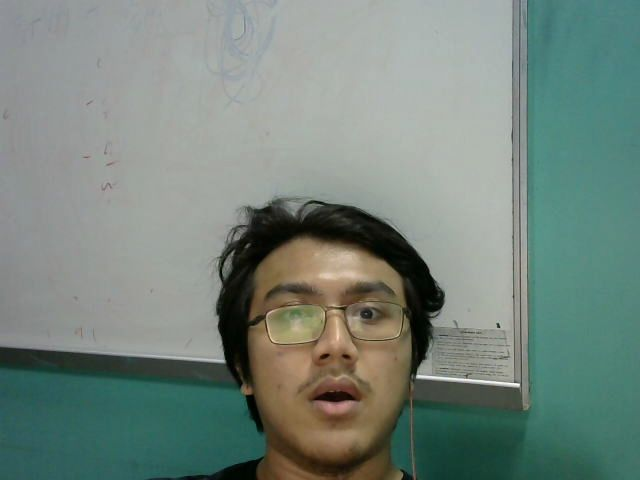

In [ ]:
from IPython.display import Image
try :
  filename = take_photo()
  print('Saved to {}'.format(filename))
 # filename1 = take_photo()
#print('Saved to {}'.format(filename1))
  #filename2 = take_photo()
 # print('Saved to {}'.format(filename2))
  # Show the image which was just taken.
  #plt.subplot(131);plt.imshow(filename)
  #plt.subplot(132);plt.imshow(filename1)
  #plt.subplot(133);plt.imshow(filename2)
  display(Image(filename))
except Exception as err:

  print(str(err))
  

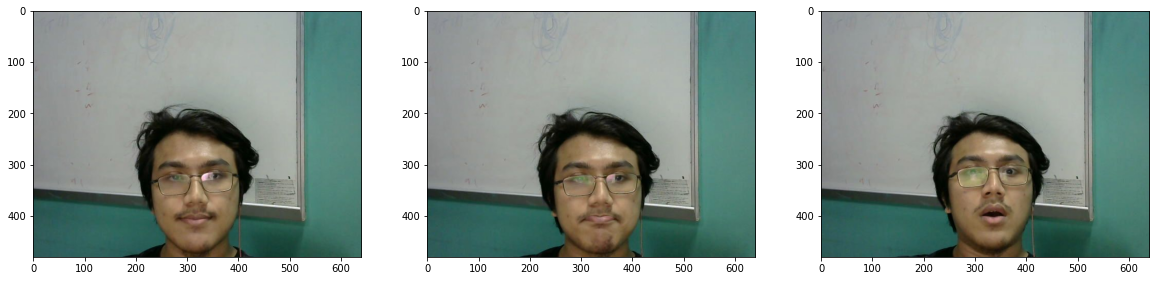

In [ ]:
happy = cv2.imread("happy.png")
sad = cv2.imread("sad.png")

devastated = cv2.imread("devastated.png")
  
happy = cv2.cvtColor(happy, cv2.COLOR_BGR2RGB)
sad = cv2.cvtColor(sad, cv2.COLOR_BGR2RGB)
devastated = cv2.cvtColor(devastated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,5))
plt.subplot(131);plt.imshow(happy)
plt.subplot(132);plt.imshow(sad)
plt.subplot(133);plt.imshow(devastated)

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

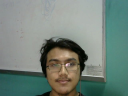

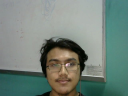

In [60]:
import cv2
import numpy as np


from google.colab.patches import cv2_imshow

# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


# Read the input image
img = cv2.imread('happy.png')

scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

cv2_imshow(resized)
# Detect faces
faces = face_cascade.detectMultiScale(
    resized,
    scaleFactor=1.5,
    minNeighbors=5,
    minSize=(30, 30))
tempImg = resized.copy()
maskShape = (resized.shape[0], resized.shape[1], 1)
mask = np.full(maskShape, 0, dtype=np.uint8)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    
    # Get the center of the face rectangle
    x_center = x + (w/2).astype(int)
    y_center = y + (h/2).astype(int)
    
    # Blur the tempImg in the area [y:y+h, x:x+w] aka where the face is.
    tempImg[y:y+h, x:x+w] = cv2.blur(tempImg[y:y+h, x:x+w] ,(10000, 10000))
    
    # Draw a circle in the mask image 
    # corresponsing to where the faces are in the original image
    
    cv2.circle(tempImg ,(x_center, y_center), int(h / 2), (255, 0, 0))
    cv2.circle(mask , (int((x + x + w )/2), int((y + y + h)/2 )), int(h / 2), (255, 0, 0), -1)
mask_inv = cv2.bitwise_not(mask)
background_img = cv2.bitwise_and(resized, resized, mask = mask_inv)
foreground_img = cv2.bitwise_and(tempImg, tempImg, mask = mask)
dst = cv2.add(background_img, foreground_img)

# Display the output
cv2_imshow(dst)

In [ ]:
img = cv2.imread('happy.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(gray,(3,3),0)

(-0.5, 639.5, 479.5, -0.5)

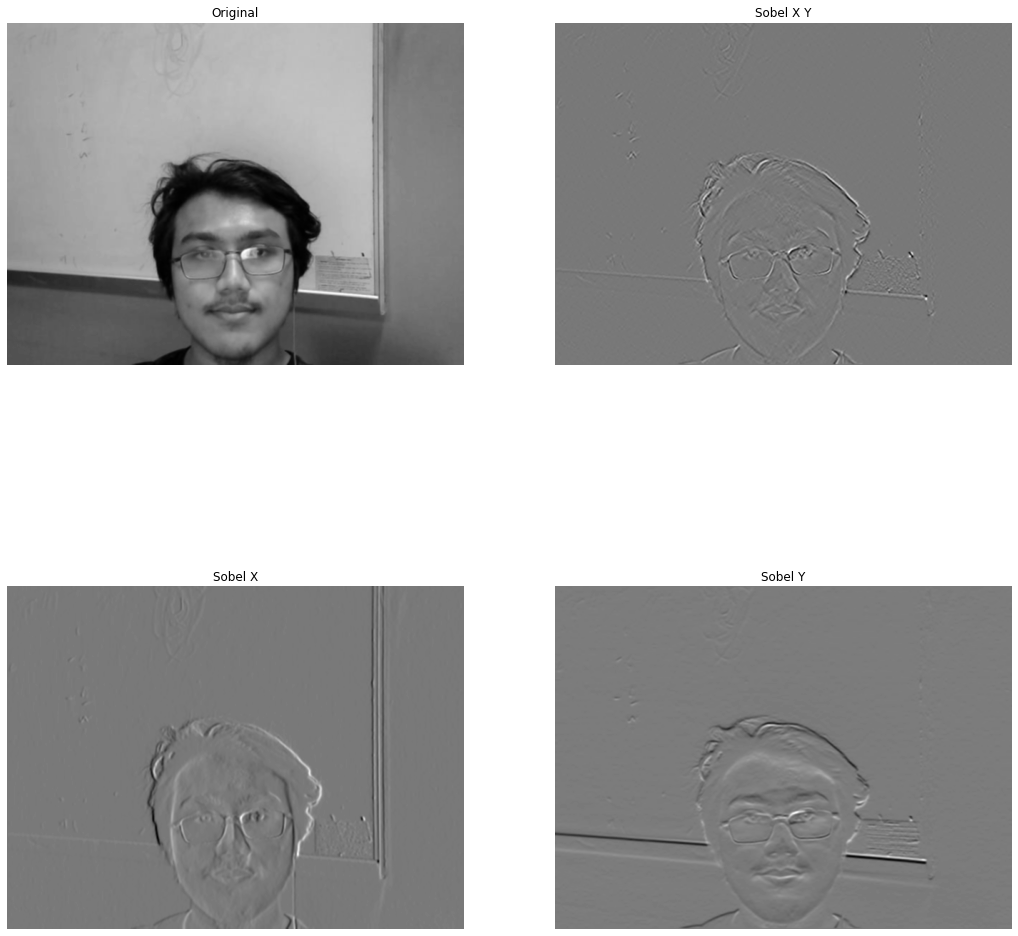

In [ ]:
sobelx = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 

sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

plt.figure(figsize=(18,19))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original') 
plt.axis("off")

plt.subplot(222)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel X Y') 
plt.axis("off")

plt.subplot(223)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X') 
plt.axis("off")

plt.subplot(224)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")

(-0.5, 639.5, 479.5, -0.5)

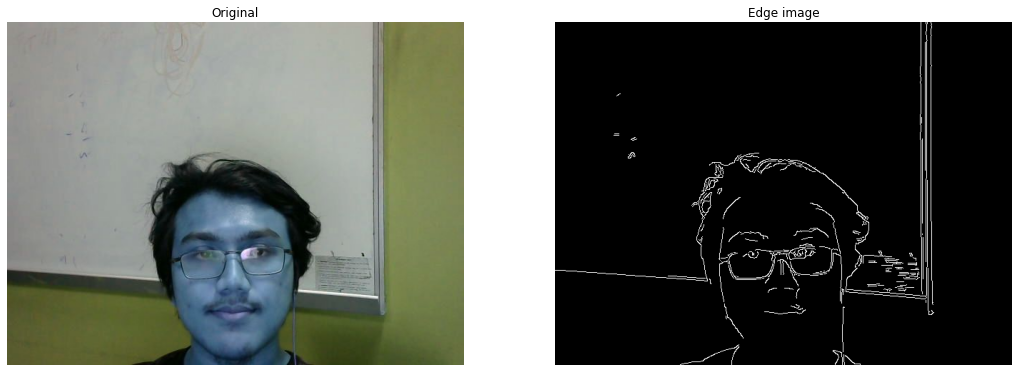

In [62]:
edges = cv2.Canny(image= img, threshold1=100, threshold2=200)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original') 
plt.axis("off")

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge image')
plt.axis("off")